In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap,SpectralEmbedding
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
import tensorflow
from keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')


# functions

In [5]:
path = "/Users/elkysandor/Desktop/hujiyr3/geo of data/swiss_roll_datasets/"
swiss_hole = scipy.io.loadmat(path+"swiss_roll_hole.mat")["x"]
swiss = scipy.io.loadmat(path+"swiss_roll.mat")["x"]
swiss_noise = scipy.io.loadmat(path+"swiss_roll_noisy.mat")["x"]

In [6]:
def iso_map_plus_plot(data,i,j):
    emmbeding = Isomap(n_components=5)
    manifold = emmbeding.fit_transform(data.T)
    fig = plt.figure(figsize=(14,7))
    axes = fig.add_subplot(1,2,1)
    axes.scatter(manifold[:,i],manifold[:,j],cmap='nipy_spectral',c=(((data[0,:])**2)+((data[2,:])**2)))
    axes = fig.add_subplot(1,2,2,projection = "3d")
    axes.scatter(data[0,:],data[1,:],data[2,:],cmap='nipy_spectral',c=(((data[0,:])**2)+((data[2,:])**2)))
    plt.tight_layout()
    plt.show()
    

In [7]:
def local_sigma(data,m):
    mnearest = NearestNeighbors(n_neighbors=m)
    mnearest.fit(data)
    local_sigmas = mnearest.kneighbors(data)[0][:,m-1]
    return local_sigmas
def build_W(data,m):
    sigmas = local_sigma(data,m)
    sigmas = np.reshape(sigmas,[sigmas.shape[0],1])
    sigmat = (sigmas)@sigmas.T
    dist = pairwise_distances(data)
    divd = np.divide(dist,sigmat)
    W_mat = np.exp(-divd)
    return W_mat

In [8]:
def spectral_embbeding1(data,gamma):
#     costum_kernel = build_W(data.T,7)
#    emmbeding = SpectralEmbedding(n_components=2,affinity="rbf",gamma=gamma)
    emmbeding = SpectralEmbedding(n_components=2,affinity="nearest_neighbors",n_neighbors=25)
    manifold = emmbeding.fit_transform(data.T)
    fig = plt.figure(figsize=(14,7))
    axes = fig.add_subplot(1,2,1)
    axes.scatter(manifold[:,0],manifold[:,1],cmap='nipy_spectral',c=manifold[:,0])
    axes = fig.add_subplot(1,2,2,projection = "3d")
    axes.scatter(data[0,:],data[1,:],data[2,:],cmap='nipy_spectral',c=manifold[:,0])
    plt.tight_layout()
    plt.show()
    

In [9]:
def spectral_embbeding2(data,t,m):
    W = build_W(data.T,m) - np.diag(np.ones(data.shape[1]))
    D_hof = np.diag((W.sum(axis=1)**-1))
    P = D_hof@W
    lamda,psi = np.linalg.eig(P)
    idx = lamda.argsort()[::-1]
    psi = psi[:,idx]
    lamda = lamda[idx]
    psi_tilda_t = psi@((np.diag(lamda**t)))
    manifold = psi_tilda_t[:,:7]
    return psi_tilda_t
        

# Q2 A

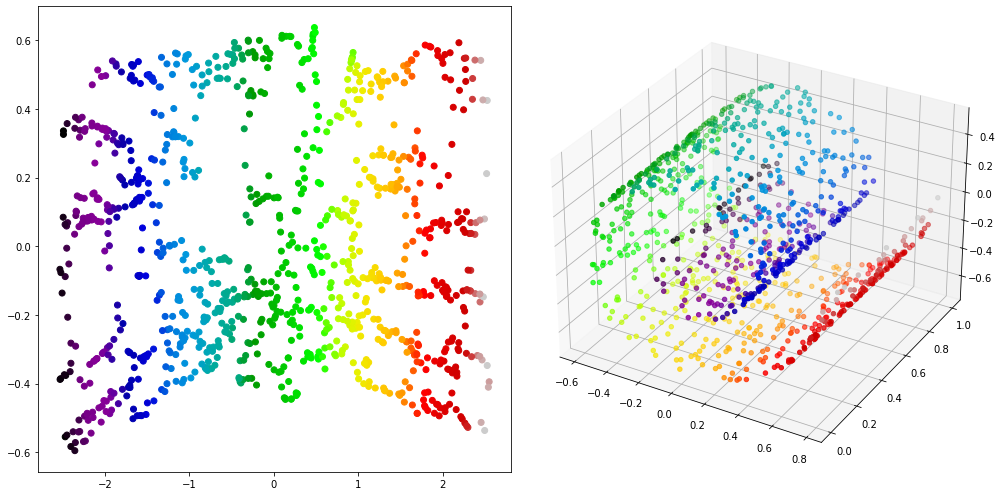

In [7]:
iso_map_plus_plot(swiss,0,1)

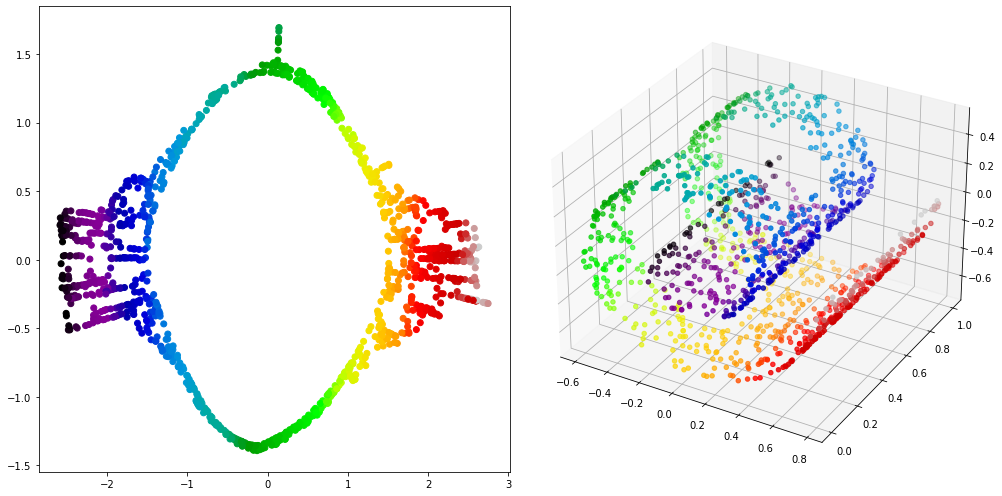

In [8]:
iso_map_plus_plot(swiss_hole,0,1)

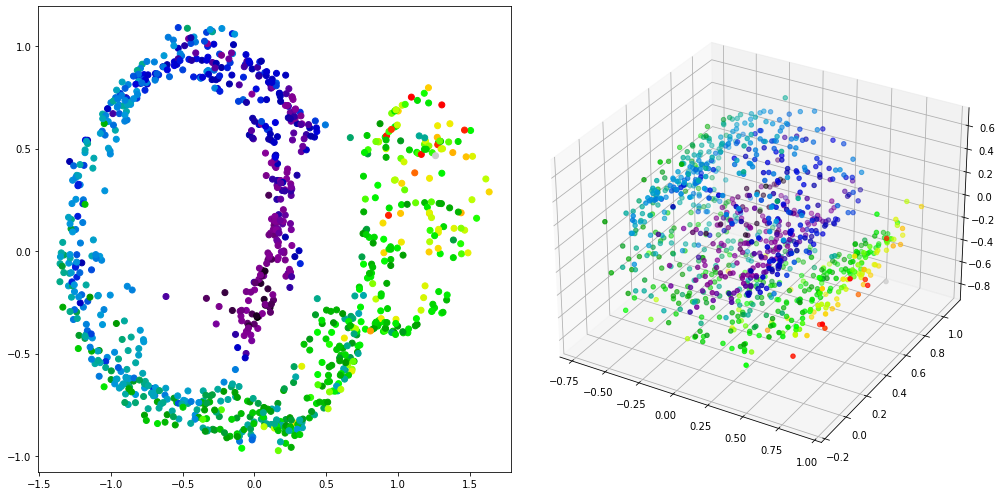

In [9]:
iso_map_plus_plot(swiss_noise,0,1)

In [10]:
psi_tilda_swiss = spectral_embbeding2(swiss,0,15)

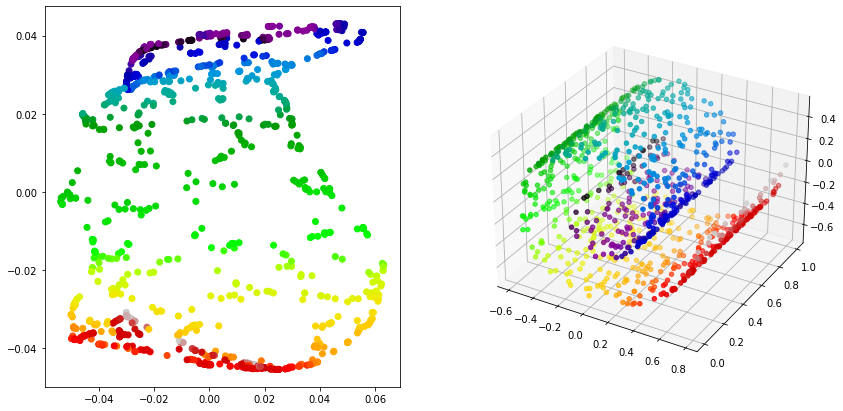

In [11]:
fig = plt.figure(figsize=(14,7))
axes = fig.add_subplot(1,2,1)
axes.scatter(psi_tilda_swiss[:,4],psi_tilda_swiss[:,1],cmap='nipy_spectral',c=((swiss[0,:])*(swiss[0,:]))+((swiss[2,:])*(swiss[2,:])))
axes = fig.add_subplot(1,2,2,projection = "3d")
axes.scatter(swiss[0,:],swiss[1,:],swiss[2,:],cmap='nipy_spectral',c=(((swiss[0,:])*(swiss[0,:]))+((swiss[2,:])*(swiss[2,:]))))

In [12]:
psi_tilda_hole = spectral_embbeding2(swiss_hole,10,15)

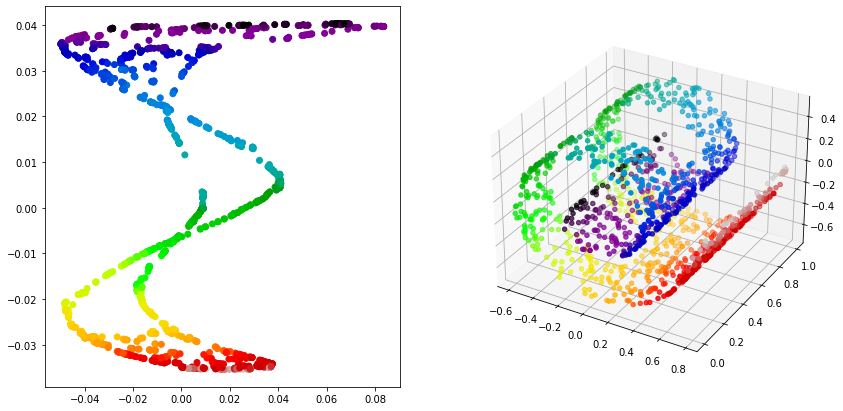

In [13]:
fig = plt.figure(figsize=(14,7))
axes = fig.add_subplot(1,2,1)
axes.scatter(psi_tilda_hole[:,7],psi_tilda_hole[:,1],cmap='nipy_spectral',c=((swiss_hole[0,:])*(swiss_hole[0,:]))+((swiss_hole[2,:])*(swiss_hole[2,:])))
axes = fig.add_subplot(1,2,2,projection = "3d")
axes.scatter(swiss_hole[0,:],swiss_hole[1,:],swiss_hole[2,:],cmap='nipy_spectral',c=(((swiss_hole[0,:])*(swiss_hole[0,:]))+((swiss_hole[2,:])*(swiss_hole[2,:]))))

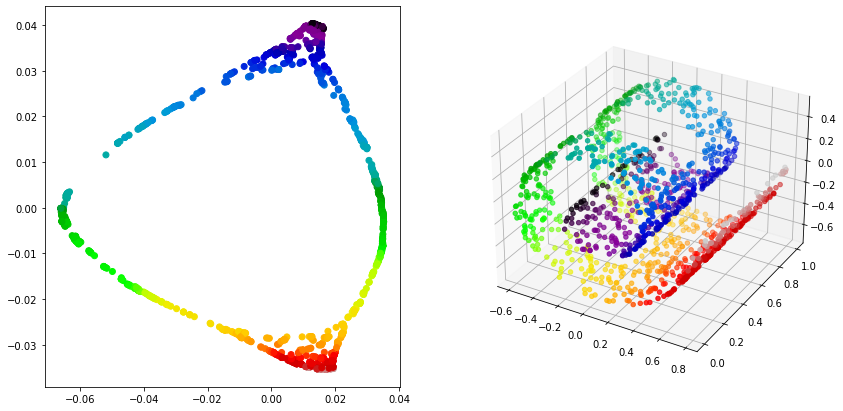

In [14]:
fig = plt.figure(figsize=(14,7))
axes = fig.add_subplot(1,2,1)
axes.scatter(psi_tilda_hole[:,2],psi_tilda_hole[:,1],cmap='nipy_spectral',c=((swiss_hole[0,:])*(swiss_hole[0,:]))+((swiss_hole[2,:])*(swiss_hole[2,:])))
axes = fig.add_subplot(1,2,2,projection = "3d")
axes.scatter(swiss_hole[0,:],swiss_hole[1,:],swiss_hole[2,:],cmap='nipy_spectral',c=(((swiss_hole[0,:])*(swiss_hole[0,:]))+((swiss_hole[2,:])*(swiss_hole[2,:]))))

In [15]:
psi_tilda_noise = spectral_embbeding2(swiss_noise,5,10)

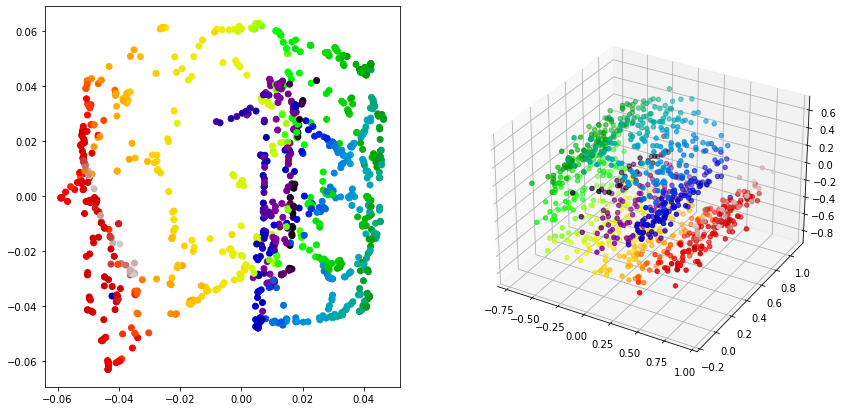

In [16]:
fig = plt.figure(figsize=(14,7))
axes = fig.add_subplot(1,2,1)
axes.scatter(psi_tilda_noise[:,1],psi_tilda_noise[:,3],cmap='nipy_spectral',c=(((swiss[0,:])**2)+((swiss[2,:])**2)))
axes = fig.add_subplot(1,2,2,projection = "3d")
axes.scatter(swiss_noise[0,:],swiss_noise[1,:],swiss_noise[2,:],cmap='nipy_spectral',c=(((swiss[0,:])**2)+((swiss[2,:])**2)))

# Q2 B

In [17]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()

In [18]:
idx = np.random.randint(0,59999,6000)
sample_minst = train_X[idx]
sample_labels = train_y[idx]

In [19]:
reshpe_samlpe = sample_minst.reshape(6000,(28**2))

In [20]:
emmbeding = Isomap(n_components=3)
manifold = emmbeding.fit_transform(reshpe_samlpe)

Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 ticks ([0, ..., 0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6000 tick

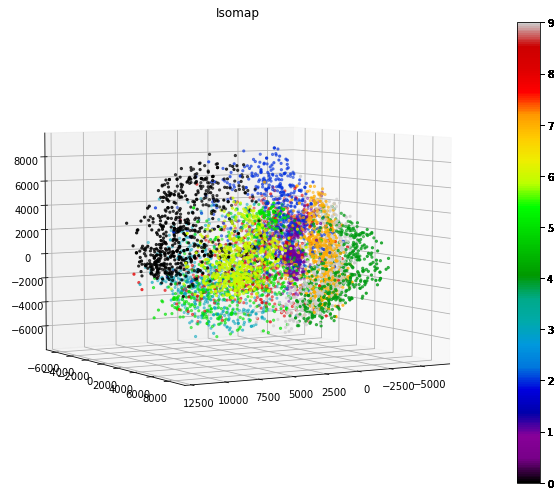

In [21]:
fig = plt.figure(figsize=(14,7))
axes = fig.add_subplot(1,1,1,projection = "3d")
tri = axes.scatter(manifold[:,0],manifold[:,1],manifold[:,2],cmap='nipy_spectral',c=sample_labels,s=5)
axes.view_init(5,60)
plt.colorbar(tri,spacing = "proportional",ticks = sample_labels)
plt.title("Isomap")
plt.tight_layout()
plt.show()


In [ ]:
W = build_W(reshpe_samlpe,25)
D_hof = np.diag((W.sum(axis=1)**-1))
P = D_hof@W
lamda,psi = np.linalg.eig(P)
idx = lamda.argsort()[::-1]
psi = psi[:,idx]
lamda = lamda[idx]
psi_tilda_t = psi@((np.diag(lamda**1)))
psi_tilda_t = np.real(psi_tilda_t)

In [ ]:
fig = plt.figure(figsize=(14,7))
axes = fig.add_subplot(1,1,1,projection = "3d")
tri2 =axes.scatter(psi_tilda_t[:,4],psi_tilda_t[:,2],psi_tilda_t[:,3],cmap='nipy_spectral',c=sample_labels,s=5)
axes.view_init(5,60)
plt.colorbar(tri2,spacing = "proportional",ticks = sample_labels)
plt.title("Laplacian Eigenmaps")
plt.tight_layout()
plt.show()


# Q3 

In [10]:
unif2 = np.random.uniform(-1,1,(1000,2))
k_nn = kneighbors_graph(unif2,30)
knn_graph = k_nn.toarray()

In [11]:
#kernel = rbf_kernel(unif2,gamma=10)
kernel = build_W(unif2,200)

In [13]:
W = np.multiply(knn_graph,kernel)
D_hof = np.diag((W.sum(axis=1)**-0.5))
L_sym= np.diag(np.ones(D_hof.shape[0]))-D_hof@W@D_hof
eigen,vecs = np.linalg.eig(L_sym)
#idx = eigen.argsort()[::-1]
#eigen = eigen[idx]
#vecs = vecs[idx]
wanted_vecs = vecs[:,:6]


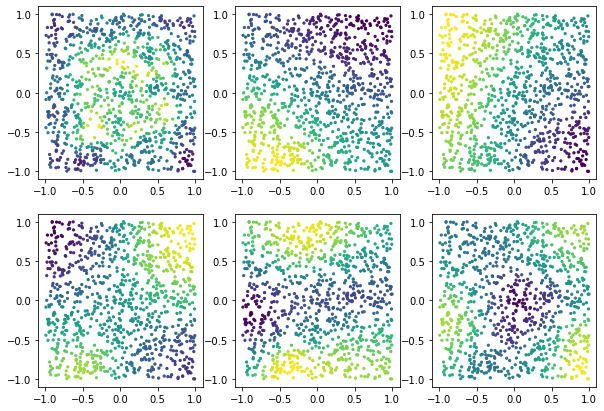

In [14]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(10,7))


axes = axes.flat
for i in range(6):
        axes[i].scatter(unif2[:,0],unif2[:,1],s=5,c=vecs[:,i])
#         axes[i].figure(figsize=(7,7))
plt.show()


In [15]:
vecs = np.real(vecs)
count = np.zeros(300)
for i in range(300):
    seq_1 = vecs[:999,i+1]
    seq_2 = vecs[1:1000,i+1]
    multiply = np.multiply(seq_1,seq_2)
    count[i] = np.where(multiply<0,1,0).sum()

In [18]:
count = np.zeros(30)
for i in range (30):
    v = np.reshape(vecs[:,i],[vecs[:,i].shape[0],1])
    mat = v@v.T
    A = np.multiply(W,mat)
    count[i] = np.argwhere(A<0).shape[0]
    



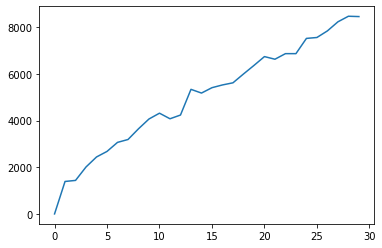

In [19]:
plt.plot(range(30),count)

In [20]:
def create_graph_signal(sigma,nodes2D):
    sqrd=nodes2D**2
    summ = sqrd[:,0]+sqrd[:,1]
    div_sig = np.divide(summ,sigma)
    signal = np.exp(-div_sig)
    return signal

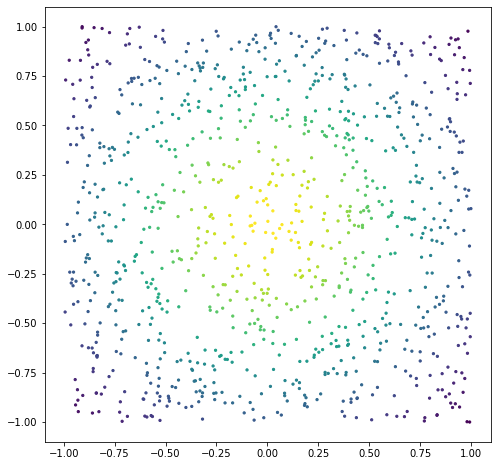

In [24]:
signal = create_graph_signal(1,unif2)
plt.figure(figsize=(8,8))
plt.scatter(unif2[:,0],unif2[:,1],s=5,c=signal)

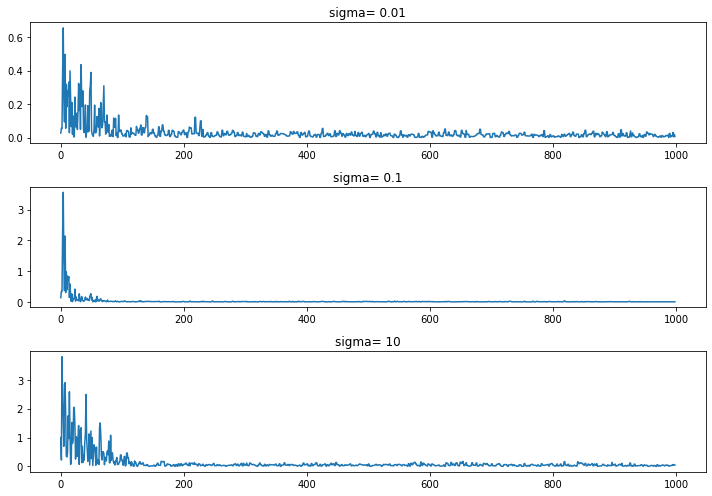

In [22]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(10,7))
axes = axes.flat

for i,j in enumerate([0.01,0.1,10]):
    signali = create_graph_signal(j,unif2)
    gi = vecs.T@(signali.reshape([1000,1]))
    axes[i].plot(range(999),np.abs(gi[1:]))
    axes[i].set_title(f"sigma= {j}")
plt.tight_layout()